In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Dataset Importation
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting = 3)

print(dataset)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [5]:
#Test Edit (Method 1)
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')  # the first thing is to download the stopwords because stop words dont really add much meaning to sentence 
                            # The cat sat on the table --- cat sat table 
nltk.download('wordnet')    # WordNet is useful for understanding word meanings, 
                            # finding synonyms, or performing tasks like word-sense disambiguation.

def preprocess_text(text):  # the funtion declaration called preprocess and accept just one parameter called text
    
    text = re.sub(r'[^\w\s]', '', text)  # text = re.sub(text)
                                         #This removes all punctuation marks from the text.
                                        # ^\w\s: Matches anything not a word character (\w) or whitespace (\s).
                                        # Replace those characters with an empty string ('').

    # Lowercase the text
    text = text.lower()  # What it does: Converts all letters in the text to lowercase.
                         #Why: Makes the text consistent, so Hello and hello are treated as the same word.
                         #Example:
                         #Input: "Hello World"
                         #Output: "hello world"

    # Remove stop words and lemmatize
    # Create a copy of the stop words list
    stop_words = set(stopwords.words('english')) # What it does: Creates a set of common English stopwords (like "the", "is", etc.) 
                                                 #that will be ignored later.
                                                 #Why: Stopwords are not very meaningful for tasks like topic modeling or classification.

    # Remove 'not' and "isn't" from the copied set
    stop_words.remove('not')     # from the list of all the stopwords you have created, remove 'not'
    stop_words.remove("isn't")   # from the list of all the stopwords you have created, remove 'is not'

    # let see why we need to remove those words above 
    # Why: Negations like "not" or "isn't" can change the meaning of a sentence 
    #(e.g., "I am not happy" is very different from "I am happy"), so you want to keep these words.

    lemmatizer = WordNetLemmatizer()  # What it does: Creates an instance of a lemmatizer.
      #Lemmatizer: A tool that reduces words to their "base" or "dictionary" form (called a lemma). For example:"running" → "run", 
      # "better" → "good"

    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]  
# What it does: Processes each word in the text as follows:
#Splits the text into a list of words using text.split().
#Removes words that are in the stop_words set.
#Applies the lemmatizer to each word that is not a stopword.
#How: This is done using a list comprehension:
#For each word in the split text, check if it’s not in stop_words.
#If it’s not, apply lemmatization and keep the word.
    return ' '.join(tokens)
    #What it does: Joins the processed words (in the tokens list) back into a single string, with spaces between the words.
    #Why: The processed text is returned in a format ready for further use (like for machine learning models).

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GOIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GOIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#Test Edit (Method 2)
import re #  Provides regular expression functionality to manipulate text.
import nltk  # Used for NLP tasks like loading stopwords.
nltk.download('stopwords') # Downloads the stopwords dataset
from nltk.corpus import stopwords  #Provides a list of common words to exclude from analysis (like "is", "the").
from nltk.stem.porter import PorterStemmer #A tool for stemming, which reduces words to their base/root form (e.g., "running" → "run").
  

corpus = []  #Creates an empty list called corpus to store the cleaned reviews
for i in range(0, 1000): #Loops through the first 1000 reviews in the dataset. i: Represents the index of the current review being processed.
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes everything that is not a letter 
    #(e.g., numbers, punctuation, special characters) and replaces it with a space. 
    # note: this will be performed on the dataframe called dataset and a particular column called Review
    review = review.lower()  # reduces the dataset information to lower case 
    review = review.split()  # Splits the review into a list of words (tokens).
    #Example: Input: "great service" Output: ['great', 'service']
    ps = PorterStemmer() # Creates a stemmer object for reducing words to their base form.
    all_stopwords = stopwords.words('english')  # Retrieves a list of English stopwords.
    all_stopwords.remove('not') #"not" will be removed from the stopwords list, so it won't be filtered 
    #This ensures that negations like "not" are preserved in the analysis.
    review = [ps.stem(word) for word in review if word not in all_stopwords]
    #Checks if the word is not in all_stopwords. 
    # it first instantiate all the words from reviews into word and not compare all the words in word with all_stopwords. 
    # if the word is not in stopword, then reteun it but if its in stop_words, remove it asap with the exception of tghe word 'not'
    #Applies stemming using ps.stem(word) to reduce words to their root form.
    #review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review) #  Joins the processed words back into a single string with spaces.
    #Example:Input: ['movi', 'not', 'bore'] Output: "movi not bore"
    corpus.append(review)

#Summary of Steps
#Remove non-alphabet characters.
#Convert text to lowercase.
#Tokenize into individual words.
#Remove stopwords (except "not").
#Stem each word.
#Join the processed words into a single string.
#Add the processed review to the corpus.



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GOIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food not amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could

In [8]:
## Apply preprocessing to the 'Review' column
dataset['Preprocessed_Review'] = dataset['Review'].apply(preprocess_text) # The function preprocess_text was performed 
# on the review column of the dataframe called dataset and resaved into the columns Preprocessed_Review columns
dataset['Preprocessed_Review']

0                                        wow loved place
1                                         crust not good
2                                not tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think well go n...
999    hadnt wasted enough life poured salt wound dra...
Name: Preprocessed_Review, Length: 1000, dtype: object

In [9]:
dataset.head(3)  # view the first four columns of the data frame 

,Review,Liked,Preprocessed_Review
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty


In [10]:
#Sentiment analysis(determining the people's sentiment (positive, negative, or neutral)

      #Creates a TextBlob object from the input text. 
    #The TextBlob object has built-in methods for analyzing text, including sentiment analysis.
    #How it works:
    #TextBlob uses pre-trained sentiment analysis models to calculate the sentiment polarity of the text.
   
    #What it does: Returns the polarity score of the text, which is a number between -1 and 1:
    #Positive Polarity (> 0): The text is positive.
    #Zero Polarity (0): The text is neutral.
    #Negative Polarity (< 0): The text is negative.
    #How it works:
    #analysis.sentiment returns a Sentiment object with two attributes:
    #polarity: How positive or negative the text is.
    #Polarity is a float value in the range [-1.0, 1.0].
    #Positive polarity indicates positive sentiment, negative polarity indicates negative sentiment, and zero indicates neutral sentiment.
    #subjectivity: How subjective or objective the text is (not used in this function).


    
    #dataset['Preprocessed_Review']: Refers to a column named Preprocessed_Review in the DataFrame dataset, which contains text data (e.g., reviews).
    #.apply(get_sentiment): Applies the get_sentiment function to each value (row) in the Preprocessed_Review column.
    #This computes the sentiment polarity for each review.
#dataset['Sentiment_Score'] =: Creates a new column Sentiment_Score in the DataFrame and assigns it the computed sentiment polarity scores.

"""
dataset[dataset['Sentiments_categorization'] == 'Positive']: Filters the DataFrame to include only rows where the sentiment category is 'Positive'.
['Preprocessed_Review']: Selects the Preprocessed_Review column from the filtered DataFrame.
" ".join(...): Joins all the positive reviews into a single string, with each review separated by a space.
Similar logic is applied for 'Negative' and 'Neutral' sentiment categories.
positive_reviews, negative_reviews, neutral_reviews: These variables store the combined text of reviews based on their sentiment categories.
""" 

'\ndataset[dataset[\'Sentiments_categorization\'] == \'Positive\']: Filters the DataFrame to include only rows where the sentiment category is \'Positive\'.\n[\'Preprocessed_Review\']: Selects the Preprocessed_Review column from the filtered DataFrame.\n" ".join(...): Joins all the positive reviews into a single string, with each review separated by a space.\nSimilar logic is applied for \'Negative\' and \'Neutral\' sentiment categories.\npositive_reviews, negative_reviews, neutral_reviews: These variables store the combined text of reviews based on their sentiment categories.\n'

In [14]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    """
    Analyzes the sentiment polarity of a given text using TextBlob.

    Parameters:
        text (str): The input text.

    Returns:
        float: Sentiment polarity score in the range [-1.0, 1.0].
               Positive (> 0): Positive sentiment
               Negative (< 0): Negative sentiment
               Neutral (0): Neutral sentiment
    """
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis and categorization
dataset['Sentiment_Score'] = dataset['Preprocessed_Review'].apply(get_sentiment)

# Categorize sentiments based on polarity score and remember the apply method helps to iterate through each value in the column
dataset['Sentiments_categorization'] = dataset['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

# Concatenate reviews by sentiment categories
positive_reviews = " ".join(dataset[dataset['Sentiments_categorization'] == 'Positive']['Preprocessed_Review'])
negative_reviews = " ".join(dataset[dataset['Sentiments_categorization'] == 'Negative']['Preprocessed_Review'])
neutral_reviews = " ".join(dataset[dataset['Sentiments_categorization'] == 'Neutral']['Preprocessed_Review'])


In [15]:
dataset[['Sentiment_Score','Sentiments_categorization']]

,Sentiment_Score,Sentiments_categorization
0,0.400000,Positive
1,-0.350000,Negative
2,-1.000000,Negative
3,0.200000,Positive
4,0.800000,Positive
...,...,...
995,0.000000,Neutral
996,0.000000,Neutral
997,-0.166667,Negative
998,0.100000,Positive


In [ ]:
"""
Code Breakdown
dataset['Negative_Reviews'] = ...

This creates a new column in the DataFrame called Negative_Reviews.
The values for this column are determined by the operation following the assignment.
dataset.apply(..., axis=1)

apply: A pandas function that allows you to apply a function to each row (or column) in the DataFrame.
axis=1: Specifies that the operation should be applied row-wise (not column-wise).
lambda row: ...

A lambda function is an inline anonymous function.
This lambda function takes each row as input (represented by row) and determines the value for the Negative_Reviews column based on the condition provided.
row['Preprocessed_Review'] if row['Sentiments_categorization'] == 'Negative' else None

This is a conditional expression:
If the value in the Sentiments_categorization column of the current row is 'Negative', the Preprocessed_Review value for that row is added to the Negative_Reviews column.
Else, the value None is assigned.

What Each Column Represents
Preprocessed_Review: Likely a column that contains cleaned or processed versions of the text reviews (e.g., tokenized, lowercased, etc.).
Sentiments_categorization: A column that contains the sentiment classification of each review (e.g., 'Positive', 'Negative', or 'Neutral').
Result
For each row in the DataFrame:

If the review is categorized as 'Negative', the Negative_Reviews column for that row will contain the text from the Preprocessed_Review column.
Otherwise, the Negative_Reviews column will have None (or NaN).
Example
Input DataFrame:

Preprocessed_Review	                        Sentiments_categorization
"food was cold and tasteless"	               Negative
"service was great!"	                       Positive
"wait time was too long"	                   Negative


After Running the Code:

Preprocessed_Review	                           Sentiments_categorization	           Negative_Reviews
"food was cold and tasteless"	                   Negative	                          "food was cold and tasteless"
"service was great!"	                           Positive	                               None
"wait time was too long"	                       Negative	                           "wait time was too long"
Why Use This?

"""

In [ ]:
"""dataset['Negative_Reviews'] = dataset.apply(
    lambda row: row['Preprocessed_Review'] if row['Sentiments_categorization'] == 'Negative' else None, axis=1
)

the code helps to create a column called 'Negative_Reviews' in the dataframe called dataset and then apply the funtion to each row of the 
column called ['Preprocessed_Review'] but in this case row wise. it take the first row of the value and check the condition under 
'Sentiments_categorization' to see if the value there is negative and assign the original text from 'Sentiments_categorization' into 
'Negative_Reviews' but otherwise it records None for that row entry


"""

In [16]:
# Create a new column with negative reviews
dataset['Negative_Reviews'] = dataset.apply(
    lambda row: row['Preprocessed_Review'] if row['Sentiments_categorization'] == 'Negative' else None, axis=1
)


In [17]:
# Create a new column with neutral reviews
dataset['Neutral_Reviews'] = dataset.apply(
    lambda row: row['Preprocessed_Review'] if row['Sentiments_categorization'] == 'Neutral' else None, axis=1
)

In [18]:
# Create a new column with positive reviews
dataset['Positive_Reviews'] = dataset.apply(
    lambda row: row['Preprocessed_Review'] if row['Sentiments_categorization'] == 'Positive' else None, axis=1
)


In [25]:
dataset[['Sentiment_Score','Sentiments_categorization', 'Positive_Reviews', 'Negative_Reviews', 'Neutral_Reviews']]


,Sentiment_Score,Sentiments_categorization,Positive_Reviews,Negative_Reviews,Neutral_Reviews
0,0.400000,Positive,wow loved place,None,None
1,-0.350000,Negative,None,crust not good,None
2,-1.000000,Negative,None,not tasty texture nasty,None
3,0.200000,Positive,stopped late may bank holiday rick steve recom...,None,None
4,0.800000,Positive,selection menu great price,None,None
...,...,...,...,...,...
995,0.000000,Neutral,None,None,think food flavor texture lacking
996,0.000000,Neutral,None,None,appetite instantly gone
997,-0.166667,Negative,None,overall not impressed would not go back,None
998,0.100000,Positive,whole experience underwhelming think well go n...,None,None


In [24]:

# Define a function to calculate subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply the function to the 'Review' column
dataset['Subjectivity'] = dataset['Preprocessed_Review'].apply(get_subjectivity)

dataset[['Sentiment_Score','Sentiments_categorization','Subjectivity','Positive_Reviews', 'Negative_Reviews', 'Neutral_Reviews']]


,Sentiment_Score,Sentiments_categorization,Subjectivity,Positive_Reviews,Negative_Reviews,Neutral_Reviews
0,0.400000,Positive,0.900000,wow loved place,None,None
1,-0.350000,Negative,0.600000,None,crust not good,None
2,-1.000000,Negative,1.000000,None,not tasty texture nasty,None
3,0.200000,Positive,0.700000,stopped late may bank holiday rick steve recom...,None,None
4,0.800000,Positive,0.750000,selection menu great price,None,None
...,...,...,...,...,...,...
995,0.000000,Neutral,0.000000,None,None,think food flavor texture lacking
996,0.000000,Neutral,0.666667,None,None,appetite instantly gone
997,-0.166667,Negative,0.333333,None,overall not impressed would not go back,None
998,0.100000,Positive,0.200000,whole experience underwhelming think well go n...,None,None


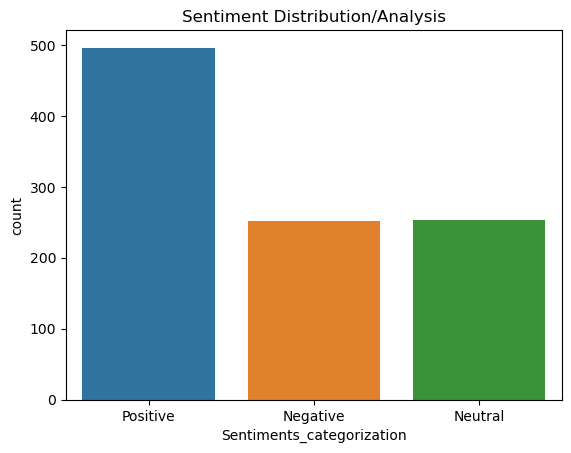

In [28]:
#Sentiment analysis visualised
sns.countplot(x='Sentiments_categorization', data=dataset)
plt.title('Sentiment Distribution/Analysis')
plt.show()

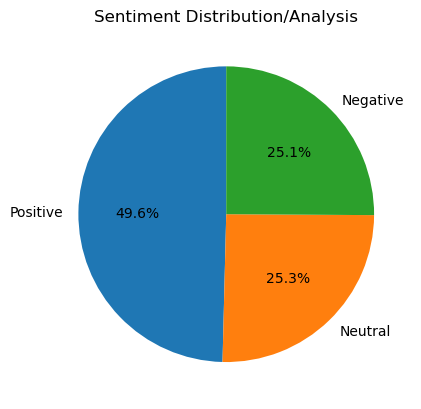

In [29]:


# Count the occurrences of each sentiment category
sentiment_counts = dataset['Sentiments_categorization'].value_counts()

# Plot a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution/Analysis')
plt.show()


In [42]:
# Sort by Sentiment Score to find the most positive and negative reviews
most_positive = dataset.sort_values(by=['Sentiment_Score'], ascending=False).head(10)
most_negative = dataset.sort_values(by=['Sentiment_Score'], ascending=True).head(10)

# Print the most positive and negative reviews
print("MOST POSITIVE REVIEWS:")
print(most_positive[['Review', 'Sentiment_Score']])

print("\nMOST NEGATIVE REVIEWS:")
print(most_negative[['Preprocessed_Review', 'Sentiment_Score']])

MOST POSITIVE REVIEWS:
                                                Review  Sentiment_Score
62       The cocktails are all handmade and delicious.              1.0
294  I didn't know pulled pork could be soooo delic...              1.0
567                                Food was delicious!              1.0
558            All of the tapas dishes were delicious!              1.0
539  The steak and the shrimp are in my opinion the...              1.0
190  you can watch them preparing the delicious food!)              1.0
781    Join the club and get awesome offers via email.              1.0
674                          Awesome service and food.              1.0
532  The best place in Vegas for breakfast (just ch...              1.0
358                Best fish I've ever had in my life!              1.0

MOST NEGATIVE REVIEWS:
                      Preprocessed_Review  Sentiment_Score
303                    food really boring             -1.0
561                   two felt disgusting  

In [49]:
# Positive and negative reviews word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def create_wordcloud(text, title):
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS
    ).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()



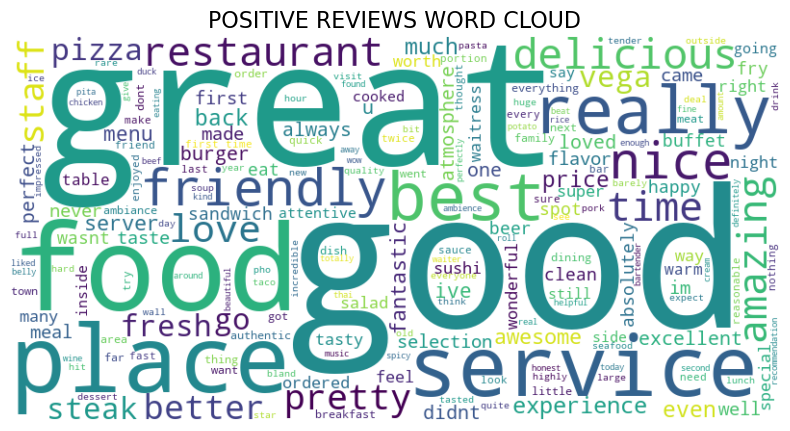

In [50]:
create_wordcloud(positive_reviews, 'POSITIVE REVIEWS WORD CLOUD')

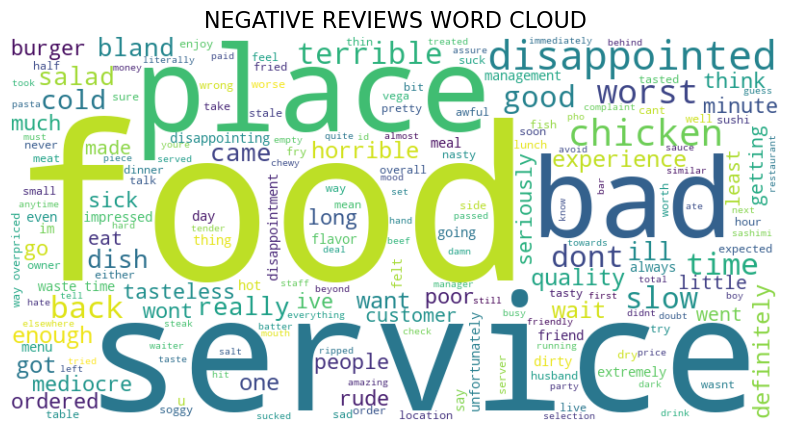

In [51]:
create_wordcloud(negative_reviews, 'NEGATIVE REVIEWS WORD CLOUD')

In [55]:
import nltk
nltk.download('brown')


from textblob import TextBlob

def analyze_aspect_sentiment(review):
    if not isinstance(review, str) or not review.strip():
        return []  # Handle empty or invalid reviews

    aspect_sentiments = []
    blob = TextBlob(review)
    for sentence in blob.sentences:
        for np in sentence.noun_phrases:
            # Extract sentiment polarity of the sentence
            sentiment = sentence.sentiment.polarity
            aspect_sentiments.append({'Aspect': np, 'Sentiment': sentiment})
    return aspect_sentiments

# Apply to your reviews
all_aspects = []
for review in dataset['Preprocessed_Review']:
    aspects = analyze_aspect_sentiment(review)
    all_aspects.extend(aspects)

# Convert to DataFrame for better visualization (if using Pandas)
import pandas as pd
aspects_df = pd.DataFrame(all_aspects)

# Display some results
print(aspects_df.head())





[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\GOIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


                                   Aspect  Sentiment
0                     tasty texture nasty       -1.0
1  bank holiday rick steve recommendation        0.2
2                          selection menu        0.8
3                             great price        0.8
4                                damn pho       -0.5


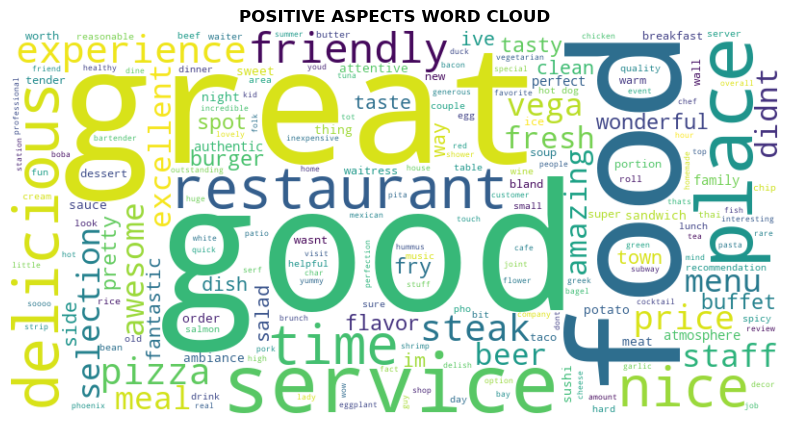

In [57]:
# Word cloud for aspects with positive & negative sentiment
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to analyze aspect sentiment
def analyze_aspect_sentiment(review):
    """Analyzes aspect sentiment in a review and returns results as a list of dictionaries."""
    results = []
    blob = TextBlob(review)
    for sentence in blob.sentences:
        for np in sentence.noun_phrases:
            sentiment = sentence.sentiment.polarity
            results.append({'aspect': np, 'sentiment': sentiment})
    return results

# Example: Apply to reviews
# Assuming `dataset['Preprocessed_Review']` contains cleaned reviews
all_aspects = []
for review in dataset['Preprocessed_Review']:
    all_aspects.extend(analyze_aspect_sentiment(review))

# Convert to DataFrame
absa_results = pd.DataFrame(all_aspects)

# Filter positive aspects
positive_aspects = absa_results[absa_results['sentiment'] > 0]['aspect']

# Generate and display word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS
).generate(' '.join(positive_aspects.astype(str).tolist()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('POSITIVE ASPECTS WORD CLOUD', fontweight='bold')
plt.show()






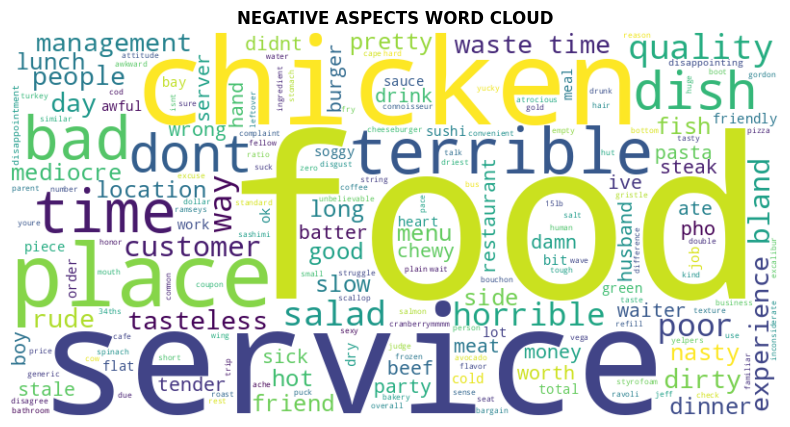

In [ ]:
# negative sentiment
negative_aspects = absa_results[absa_results['sentiment'] < 0]['aspect']
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(negative_aspects.astype(str).tolist()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEGATIVE ASPECTS WORD CLOUD', fontweight='bold')
plt.show()

In [ ]:
#Emotion review
def detect_emotion(review):
  """Detects emotion in a review and returns a dictionary with results."""
  blob = TextBlob(review) # TextBlob's sentiment provides polarity and subjectivity
  sentiment = blob.sentiment
  print(f"Review: {review}, Sentiment: {sentiment}")

for review in datasett['Preprocessed_Review']:
    detect_emotion(review)

Review: wow loved place, Sentiment: Sentiment(polarity=0.39999999999999997, subjectivity=0.9)
Review: crust not good, Sentiment: Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)
Review: not tasty texture nasty, Sentiment: Sentiment(polarity=-1.0, subjectivity=1.0)
Review: stopped late may bank holiday rick steve recommendation loved, Sentiment: Sentiment(polarity=0.19999999999999998, subjectivity=0.7)
Review: selection menu great price, Sentiment: Sentiment(polarity=0.8, subjectivity=0.75)
Review: getting angry want damn pho, Sentiment: Sentiment(polarity=-0.5, subjectivity=1.0)
Review: honeslty didnt taste fresh, Sentiment: Sentiment(polarity=0.3, subjectivity=0.5)
Review: potato like rubber could tell made ahead time kept warmer, Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Review: fry great, Sentiment: Sentiment(polarity=0.8, subjectivity=0.75)
Review: great touch, Sentiment: Sentiment(polarity=0.8, subjectivity=0.75)
Review: service prompt, Sentiment: Sentiment(po

## Emotion(Polarity & Subejectivity) Visuals

In [59]:
def detect_emotion(review):
    """Detects emotion in a review and returns a dictionary with results."""
    blob = TextBlob(review)
    sentiment = blob.sentiment
    return {'review': review, 'polarity': sentiment.polarity, 'subjectivity': sentiment.subjectivity}

all_results = []
for review in dataset['Preprocessed_Review']:
    all_results.append(detect_emotion(review))


emotion_df = pd.DataFrame(all_results)


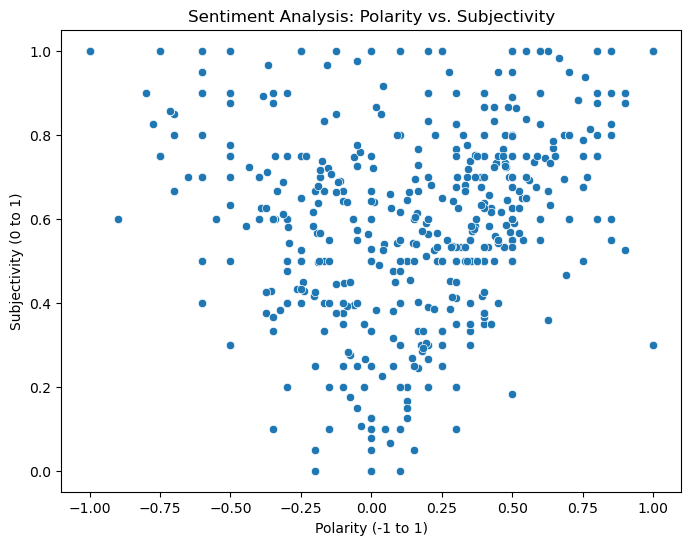

Text(0.5, -0.1, '"The above scatter plot visual clearly shows how sentiment varies in terms of positivity/negativity (polarity) and personal opinion/factual information (subjectivity)."')

<Figure size 640x480 with 0 Axes>

In [60]:
# 1. Scatter plot of polarity vs. subjectivity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='polarity', y='subjectivity', data=emotion_df)
plt.title('Sentiment Analysis: Polarity vs. Subjectivity')
plt.xlabel('Polarity (-1 to 1)')
plt.ylabel('Subjectivity (0 to 1)')
plt.show()

plt.figtext(0.5, -0.1, '"The above scatter plot visual clearly shows how sentiment varies in terms of positivity/negativity (polarity) and personal opinion/factual information (subjectivity)."', ha='center', fontsize=10, wrap=True)

C:\Users\GOIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


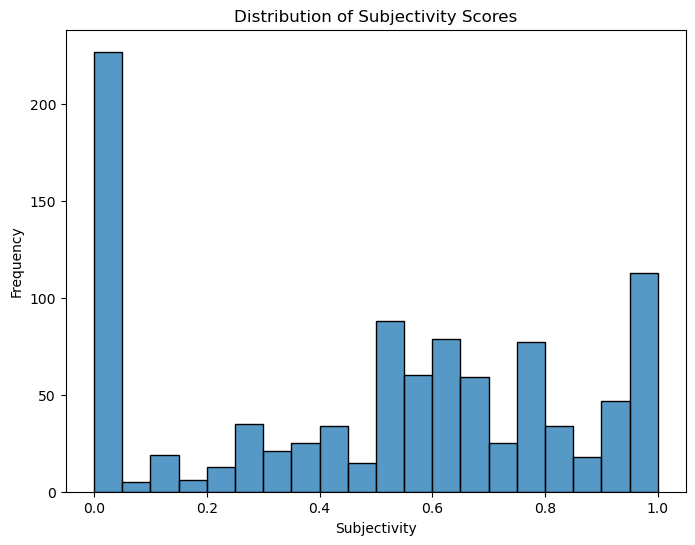

Text(0.5, -0.1, '"Above visual shows a high frequency of scores at 0.0 and 1.0, indicating that many reviews are either highly objective or highly subjective."')

<Figure size 640x480 with 0 Axes>

In [61]:
# 2. Histogram of subjectivity scores
plt.figure(figsize=(8, 6))
sns.histplot(emotion_df['subjectivity'], bins=20)
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

# Add the note below the plot
plt.figtext(0.5, -0.1, '"Above visual shows a high frequency of scores at 0.0 and 1.0, indicating that many reviews are either highly objective or highly subjective."', ha='center', fontsize=10, wrap=True)

C:\Users\GOIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


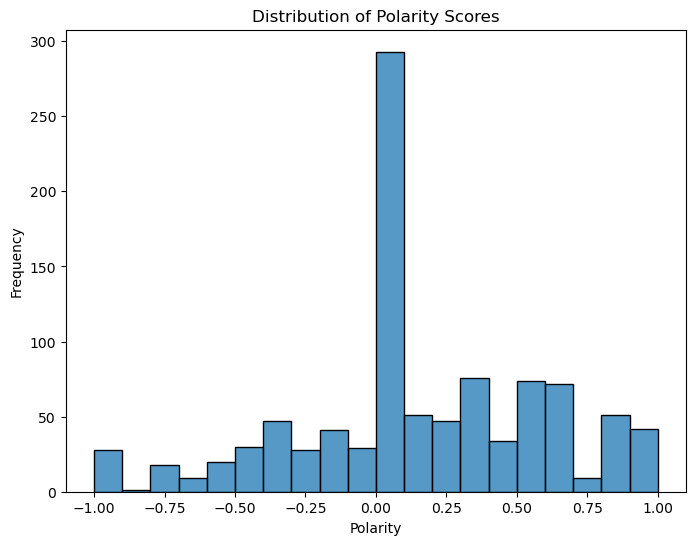

Text(0.5, -0.15, '"This histogram illustrates the distribution of sentiment polarity (positive & negative) scores, revealing the overall sentiment trend in the reviews. A skew towards positive values indicates generally positive sentiment, while a skew towards negative values suggests negative sentiment. From the above histogram, we can clearly see that the values are more skewed towards the positive values, which means more positive trends."')

<Figure size 640x480 with 0 Axes>

In [62]:
# 3. Histogram of polarity scores
plt.figure(figsize=(8, 6))
sns.histplot(emotion_df['polarity'], bins=20)
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Add the note below the plot
plt.figtext(0.5, -0.15, '"This histogram illustrates the distribution of sentiment polarity (positive & negative) scores, revealing the overall sentiment trend in the reviews. A skew towards positive values indicates generally positive sentiment, while a skew towards negative values suggests negative sentiment. From the above histogram, we can clearly see that the values are more skewed towards the positive values, which means more positive trends."', ha='center', fontsize=10, wrap=True)